In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
soc=pd.read_csv("/content/Social_Network_Ads.csv")
soc.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X=soc.iloc[:,[2,3]].values
y=soc.iloc[:,4].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
cf=KNeighborsClassifier(n_neighbors=5)#to check nearest 5 neighbors
cf.fit(X_train,y_train)
pred=cf.predict(X_test)

In [10]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred))

93.0


<Axes: >

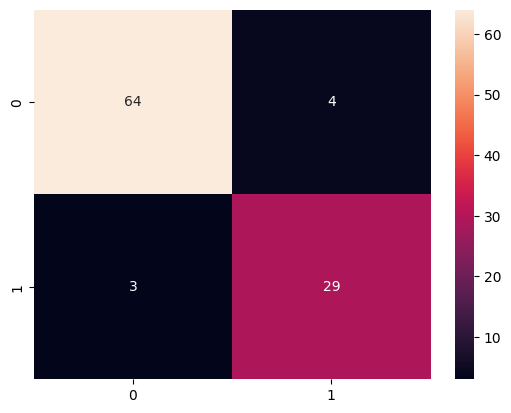

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



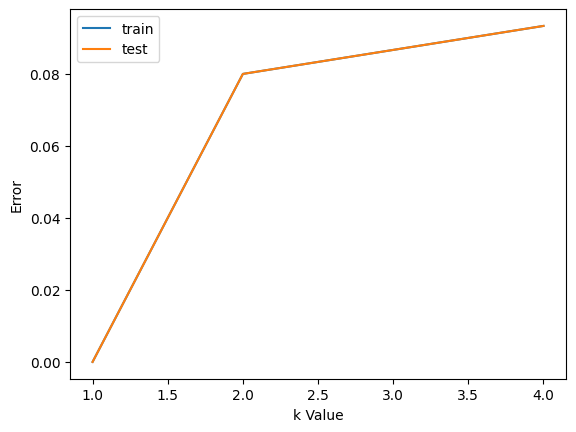

In [20]:
error1=[]
error2=[]
for k in range(1,5):
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred1=knn.predict(X_train)
  error1.append(np.mean(y_train!=y_pred1))
  y_pred2=knn.predict(X_test)
  error2.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,5),error1,label='train')
plt.plot(range(1,5),error1,label='test')
plt.xlabel('k Value')
plt.ylabel("Error")
plt.legend()
plt.show()
